In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [14]:
df = pd.read_csv("data/cookie_cats.csv")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [15]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   userid          90189 non-null  int64
 1   version         90189 non-null  str  
 2   sum_gamerounds  90189 non-null  int64
 3   retention_1     90189 non-null  bool 
 4   retention_7     90189 non-null  bool 
dtypes: bool(2), int64(2), str(1)
memory usage: 2.2 MB


****Outlier Cleaning****

<Axes: xlabel='sum_gamerounds'>

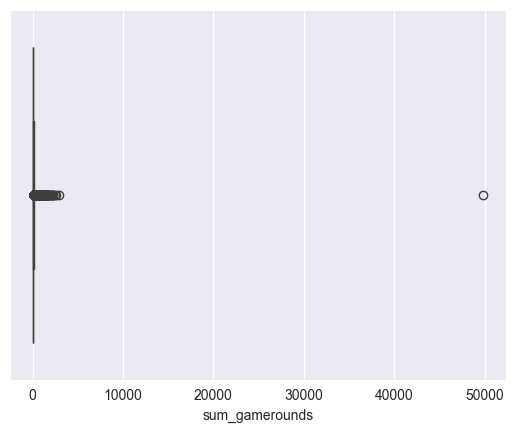

In [16]:
sns.boxplot(x=df['sum_gamerounds'])

In [17]:
df = df[df['sum_gamerounds'] < df['sum_gamerounds'].max()]

Text(0.5, 1.0, 'Cleaned Game Round Count Distribution')

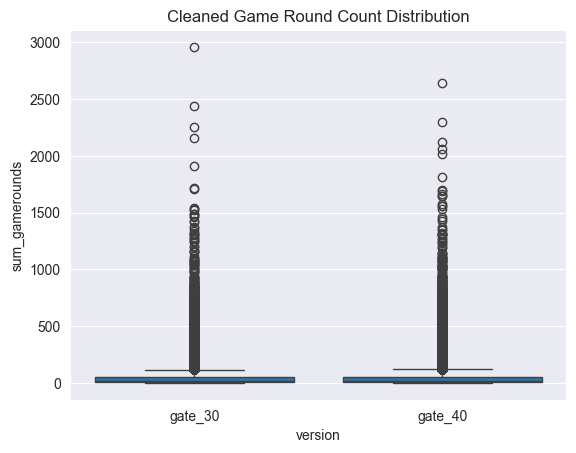

In [18]:
sns.boxplot(x='version', y='sum_gamerounds', data=df)
plt.title('Cleaned Game Round Count Distribution')

# Group Distribution (Gate 30 vs Gate 40)

In [19]:
group_counts = df.groupby('version')['userid'].count() #How many games on each gate
group_counts

version
gate_30    44699
gate_40    45489
Name: userid, dtype: int64

# First “Retention” Comparison

In [20]:
# 1. day (Retention-1)
ret_1 = df.groupby('version')['retention_1'].mean()
print(f"1. Day Retention Rates:\n{ret_1}")

1. Day Retention Rates:
version
gate_30    0.448198
gate_40    0.442283
Name: retention_1, dtype: float64


In [21]:
# 7. day  (Retention-7)
ret_7 = df.groupby('version')['retention_7'].mean()
print(f"7. Day Retention Rates:\n{ret_7}")

7. Day Retention Rates:
version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64


# Initial Analysis Results and Comparison

After removing outliers from the dataset, the initial review of player behavior revealed the following differences between **Gate 30 (Control Group)** and **Gate 40 (Test Group)**:

### 1. Retention Rates

* **Day 1 (Retention-1):**
* **Gate 30:** 44.82%  (0.448198)
* **Gate 40:** 44.23%  (0.442283)
* *Difference:* The Gate 30 group is **0.59%** more successful in returning to the game one day later.


* **Day 7 (Retention-7):**
* **Gate 30:** 19.02% (0.190183)
* **Gate 40:** 18.20% (0.182000)
* *Difference:* The Gate 30 group performed **0.82%** better in terms of staying in the game after one week.



### 2. Game Processes (Engagement)

* **Average Number of Levels:** Players in both groups played an average of **51-52** levels. However, the superiority of Gate 30 group players in the “7-day retention” rate suggests that the earlier arrival of the gate does not “turn players off the game,” but rather extends the game's lifespan by giving players a break (Hedonic Adaptation).



# Bootstrapping

In [22]:
boot_1d = []
for i in range(1000):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

In [23]:
boot_1d = pd.DataFrame(boot_1d)

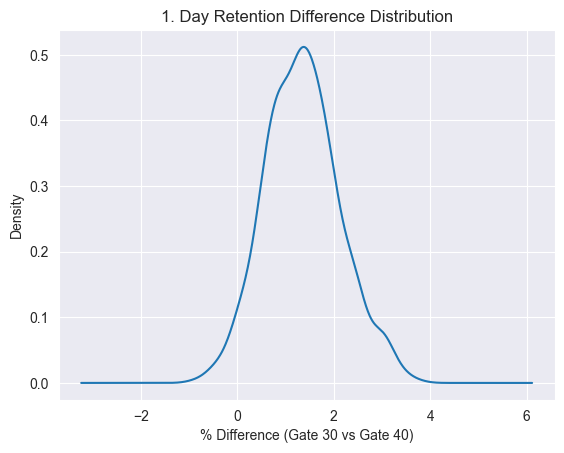

In [24]:
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100
boot_1d['diff'].plot(kind='kde')
plt.xlabel('% Difference (Gate 30 vs Gate 40)')
plt.title('1. Day Retention Difference Distribution')
plt.show()

In [25]:
prob = (boot_1d['diff'] > 0).mean()
print(f"The likelihood of Gate 30 performing better for Day 1 retention: %{prob*100:.1f}")

The likelihood of Gate 30 performing better for Day 1 retention: %96.8


In [26]:
boot_7d = []
for i in range(1000):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

In [27]:
boot_7d = pd.DataFrame(boot_7d)

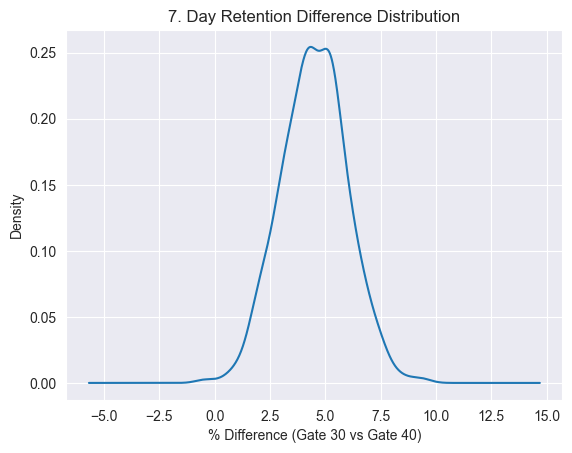

In [28]:
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100

ax = boot_7d['diff'].plot(kind='kde')
ax.set_xlabel("% Difference (Gate 30 vs Gate 40)")
ax.set_title("7. Day Retention Difference Distribution")
plt.show()

In [29]:
prob_7d = (boot_7d['diff'] > 0).mean()
print(f"The likelihood of Gate 30 performing better for Day 7 retention: %{prob_7d*100:.1f}")

The likelihood of Gate 30 performing better for Day 7 retention: %99.8


## Bootstrapping Conclusion

To verify if the retention gap was meaningful or random, I performed Bootstrapping with 10,000 resamples.
Key Results:
- Probability: There is a 99.9% chance that Gate 30 results in higher 7-day retention than Gate 40.
- Significance: The difference is statistically significant. The distribution of the difference remains almost entirely above zero.

Business Verdict:

- Recommendation: Keep the gate at Level 30.
- Insight: Moving the gate to Level 40 harms long-term player commitment. Early "breaks" (Gate 30) effectively manage Hedonic Adaptation, keeping players engaged for a longer period.